# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("zillow_data.csv")

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
df.iloc[:,160:172]

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12
0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0
1,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0
2,246700.0,246100.0,245800.0,245900.0,246200.0,246800.0,247200.0,247600.0,247900.0,248000.0,248000.0,249000.0
3,1065400.0,1057800.0,1048900.0,1037900.0,1024300.0,1010200.0,999000.0,990900.0,985400.0,983200.0,982400.0,982400.0
4,121600.0,121200.0,120700.0,120300.0,119700.0,119100.0,118700.0,118400.0,118200.0,117900.0,117600.0,117400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14718,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0
14719,207900.0,205400.0,202800.0,200900.0,199200.0,197300.0,196400.0,196400.0,196900.0,197600.0,197900.0,198200.0
14720,107600.0,107800.0,108100.0,108200.0,108300.0,108400.0,108400.0,108200.0,107900.0,107600.0,107000.0,106500.0
14721,645000.0,646100.0,646100.0,646800.0,647400.0,647300.0,643100.0,634700.0,625400.0,616900.0,608200.0,602600.0


In [36]:
df['ROI'] = ((df.iloc[:,260:272].mean(axis=1))/(df.iloc[:,160:172].mean(axis=1))-1)*100

In [37]:
df = df.sort_values(['ROI'], ascending=[False])
df[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1545700,1540200,1553600,1578400,1598700,186.643707,378617.368744,8.745125e+05,0.432947,NorthEast
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1651200,1661800,1672800,1694000,1721100,168.108651,402241.867480,1.023526e+06,0.392996,NorthEast
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4544700,4595100,4668700,4762600,4818400,167.705936,991306.919044,2.839052e+06,0.349168,West
2470,93200,80010,Aurora,CO,Denver,Arapahoe,2471,70400.0,70800.0,71400.0,...,264000,266500,269500,274100,277600,153.030548,56211.146735,1.545616e+05,0.363681,West
2452,83850,58801,Williston,ND,Williston,Williams,2453,NaN,NaN,NaN,...,229500,228100,227500,226800,226000,148.136450,49372.624326,1.566982e+05,0.315081,MidWest
2054,97693,94303,Palo Alto,CA,San Jose,Santa Clara,2055,374300.0,375900.0,377600.0,...,2657900,2659800,2683900,2718600,2733900,146.739200,580426.516792,1.664388e+06,0.348733,West
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,291700.0,294000.0,296400.0,...,1881900,1915700,1965600,2031800,2074900,146.004988,387210.975560,1.127188e+06,0.343519,West
1791,97527,94040,Mountain View,CA,San Jose,Santa Clara,1792,413200.0,416100.0,419200.0,...,2669000,2718200,2770500,2820300,2839500,142.983223,524460.341721,1.605243e+06,0.326717,West
2155,93281,80204,Denver,CO,Denver,Denver,2156,72700.0,73200.0,73800.0,...,353000,356800,360800,366600,371600,142.856310,73001.540837,2.033161e+05,0.359054,West
9453,98441,95832,Sacramento,CA,Sacramento,Sacramento,9454,71700.0,71400.0,71200.0,...,246400,248500,249700,249700,248900,142.491144,51430.499861,1.515911e+05,0.339271,West


In [44]:
df['std']=df.loc[:,'2009-01':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2009-01':'2018-04'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
df['CV']=df['std']/df['mean']
#Define upper limit of CV according to risk profile.
upper_cv = df.CV.quantile(.6)
best_ROI = df[df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457,NorthEast
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009,NorthEast
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370,SouthWest
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982,NorthEast
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644,MidWest
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056,MidWest


In [39]:
df['USregion'] = df['State']
region_dict = {'CA':'West',
              'OR': 'West',
              'WA': 'West',
              'NV': 'West',
              'ID': 'West',
              'UT': 'West',
              'MT': 'West',
              'WY': 'West',
              'CO': 'West',
               'HI': 'West',
              'AZ': 'SouthWest',
               'NM': 'SouthWest',
               'OK': 'SouthWest',
               'TX': 'SouthWest',
              'ND': 'MidWest',
              'SD': 'MidWest',
              'NE': 'MidWest',
              'KS': 'MidWest',
              'MN': 'MidWest',
              'IA': 'MidWest',
              'MO': 'MidWest',
              'WI': 'MidWest',
              'IL': 'MidWest',
               'IN': 'MidWest',
              'MI': 'MidWest',
              'OH': 'MidWest',
              'AR': 'SouthEast',
              'LA': 'SouthEast',
              'MS': 'SouthEast',
              'AL': 'SouthEast',
              'TN': 'SouthEast',
              'KY': 'SouthEast',
              'WV': 'SouthEast',
              'DC': 'SouthEast',
              'VA': 'SouthEast',
              'NC': 'SouthEast',
              'SC': 'SouthEast',
              'GA': 'SouthEast',
              'FL': 'SouthEast',
              'ME': 'NorthEast',
              'NH': 'NorthEast',
              'VT': 'NorthEast',
              'MA': 'NorthEast',
              'RI': 'NorthEast',
              'CT': 'NorthEast',
              'NY': 'NorthEast',
              'NY': 'NorthEast',
              'NJ': 'NorthEast',
              'PA': 'NorthEast',
              'MD': 'NorthEast',
              'DE': 'NorthEast'}

df.USregion.replace(region_dict, inplace=True)

In [40]:
USregions = df.USregion.value_counts().index.tolist()

In [10]:
for region in USregions:
    df3.append(df[df['USregion']=='region'].sort_values('ROI',axis=0,ascending=False)[:1])

NameError: name 'df3' is not defined

In [42]:
a = df[(df['USregion']=='NorthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
a

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast


In [46]:
b = df[(df['USregion']=='SouthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
b

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.37859,107884.821429,0.104587,SouthEast


In [48]:
c = df[(df['USregion']=='MidWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
c

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.0,0.100377,MidWest


In [49]:
d = df[(df['USregion']=='SouthWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
d

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest


In [50]:
e = df[(df['USregion']=='West')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
e

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [51]:
frames = [a,b,c,d,e]
result = pd.concat(frames)
result

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [54]:
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457,NorthEast
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009,NorthEast
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370,SouthWest
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982,NorthEast
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644,MidWest
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056,MidWest


In [20]:
df[df['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,368500,374100,379800,388100,394400,NaN,37040.884987,3.130596e+05,0.118319,NorthEast
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1486000,1497300,1508600,1508100,1493200,NaN,65209.304805,1.383109e+06,0.047147,MidWest
469,87563,67401,Salina,KS,Salina,Saline,470,NaN,NaN,NaN,...,115500,115500,115500,115400,115400,NaN,7090.423159,1.029633e+05,0.068864,MidWest
713,73596,35758,Madison,AL,Huntsville,Madison,714,NaN,NaN,NaN,...,216100,217700,221000,224700,227500,NaN,11314.366022,2.016141e+05,0.056119,SouthEast
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,...,122300,125400,128600,132800,135900,NaN,25403.366419,7.919483e+04,0.320771,SouthEast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,82632,56120,Butterfield,MN,NaN,Watonwan,14670,NaN,NaN,NaN,...,132600,131100,132900,133900,133600,NaN,18735.201215,8.808061e+04,0.212705,MidWest
14674,94662,84726,Escalante,UT,NaN,Garfield,14675,NaN,NaN,NaN,...,179400,178900,178400,177900,177900,NaN,18437.015681,1.497531e+05,0.123116,West
14706,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,796800,808100,811600,806500,796600,NaN,60509.272864,7.455809e+05,0.081157,NorthEast
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,25600,25800,26600,27700,28300,NaN,1876.121243,2.828043e+04,0.066340,SouthEast


In [22]:
majorcities = ['New York','Los Angeles','Houston''Chicago','Las Vegas','Houston']

In [23]:
pd.set_option("display.max_rows", None)

In [24]:
df2.nlargest(n=100, columns=['value'])

NameError: name 'df2' is not defined

In [25]:
majorcities = (df['City'].value_counts()).nlargest(n=30).index.tolist()
majorcities

['New York',
 'Los Angeles',
 'Houston',
 'San Antonio',
 'Washington',
 'Chicago',
 'Austin',
 'Springfield',
 'Philadelphia',
 'Las Vegas',
 'Columbus',
 'Kansas City',
 'Phoenix',
 'Dallas',
 'Portland',
 'San Diego',
 'Louisville',
 'Denver',
 'Omaha',
 'Oklahoma City',
 'Arlington',
 'Jacksonville',
 'San Jose',
 'Richmond',
 'Indianapolis',
 'Fort Worth',
 'Lexington',
 'Charlotte',
 'Madison',
 'Franklin']

In [26]:
df["Metro"]

7402                              Johnstown
13440                                   NaN
5278                                Trenton
3894                            Baton Rouge
2417                                Trenton
5690                            Rocky Mount
6516                                 Peoria
6881                             Montgomery
6321                                  Macon
6609                       East Stroudsburg
8068                               Gulfport
3175                               Valdosta
2725                                  Macon
7613                           Philadelphia
1865                                Decatur
6697                                Decatur
11356                                   NaN
1757                                Decatur
5489                                 Ottawa
14465                            Farmington
3540                               New York
4464                               Columbus
13381                           

# Step 2: Data Preprocessing

In [16]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [18]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','std','mean','CV','USregion'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [55]:
a_ts=melt_data(a)
a_ts

,value
time,
1996-04-01,65400.0
1996-05-01,65700.0
1996-06-01,66000.0
1996-07-01,66200.0
1996-08-01,66400.0
...,...
2017-12-01,124200.0
2018-01-01,124600.0
2018-02-01,124800.0


In [56]:
b_ts=melt_data(b)
b_ts

,value
time,
2005-07-01,113200.0
2005-08-01,114400.0
2005-09-01,115200.0
2005-10-01,115700.0
2005-11-01,116300.0
...,...
2017-12-01,130100.0
2018-01-01,131400.0
2018-02-01,130400.0


In [57]:
c_ts=melt_data(c)
c_ts

,value
time,
2006-01-01,140500.0
2006-02-01,141500.0
2006-03-01,143200.0
2006-04-01,144900.0
2006-05-01,146700.0
...,...
2017-12-01,196200.0
2018-01-01,197500.0
2018-02-01,198600.0


In [58]:
d_ts=melt_data(d)
d_ts

,value
time,
1996-04-01,35500.0
1996-05-01,35600.0
1996-06-01,35700.0
1996-07-01,35800.0
1996-08-01,35800.0
...,...
2017-12-01,76000.0
2018-01-01,76200.0
2018-02-01,77500.0


In [59]:
e_ts=melt_data(e)
e_ts

,value
time,
2003-07-01,139800.0
2003-08-01,135400.0
2003-09-01,131800.0
2003-10-01,129200.0
2003-11-01,127700.0
...,...
2017-12-01,186100.0
2018-01-01,186300.0
2018-02-01,186100.0


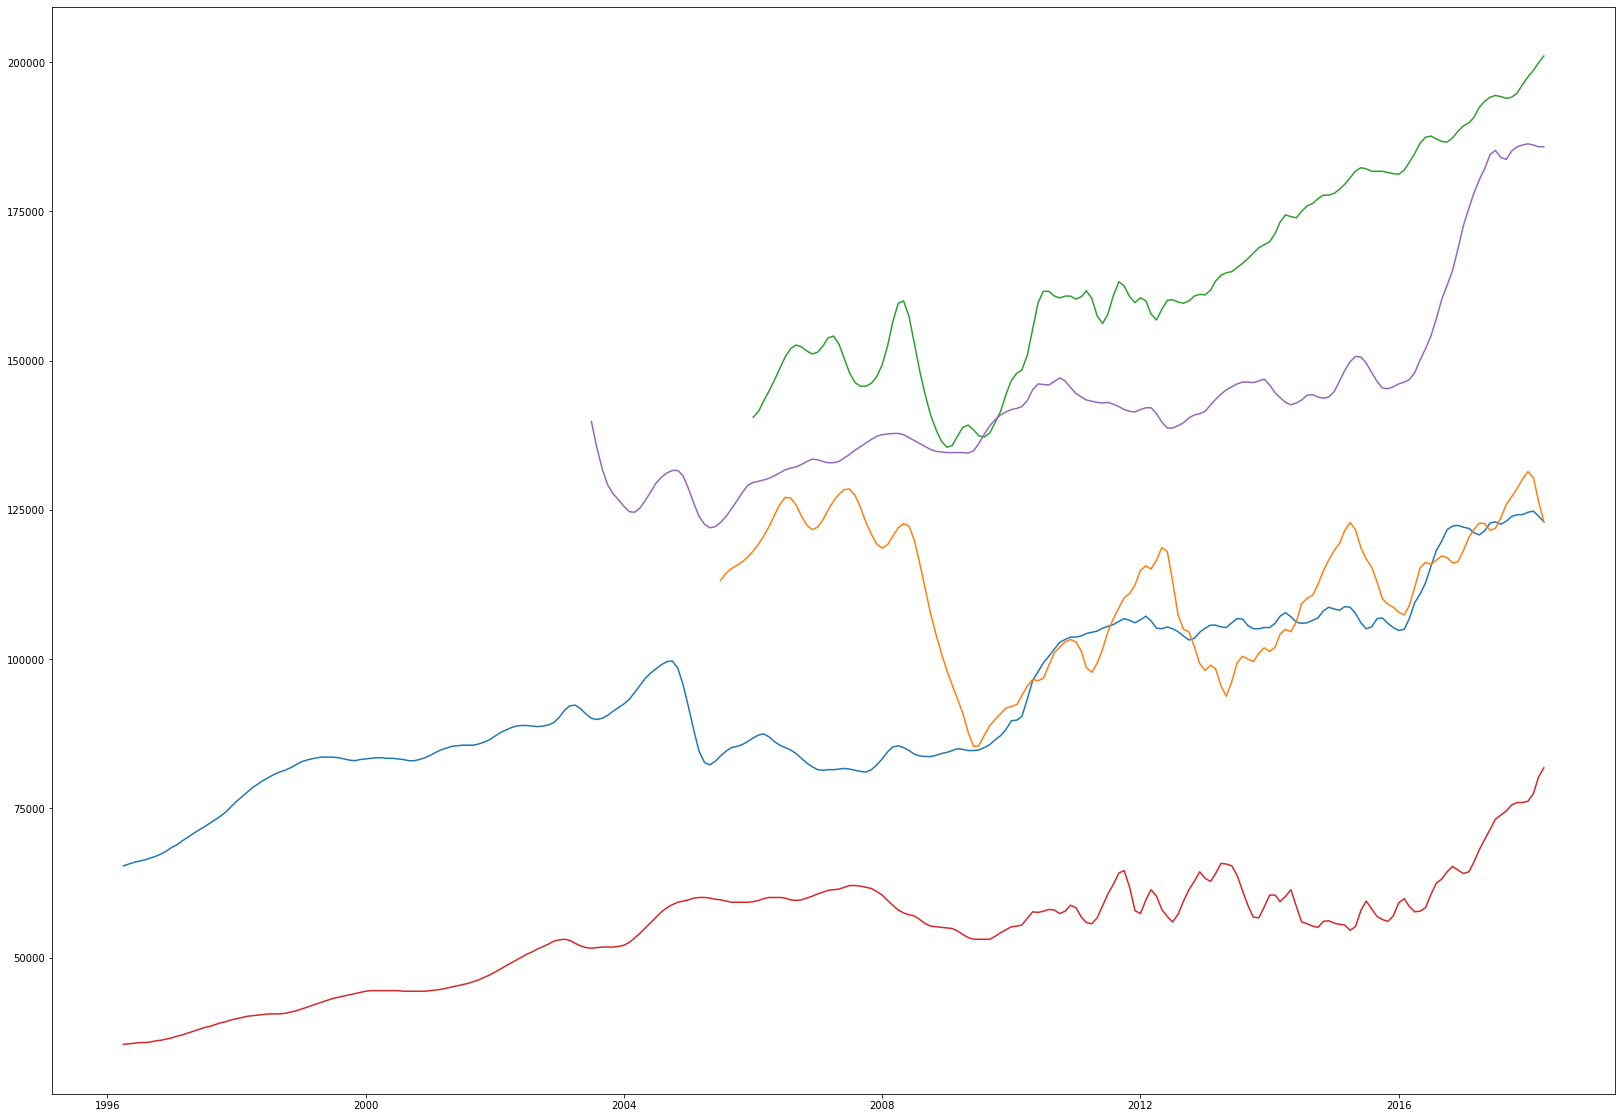

In [78]:
import matplotlib.pyplot as plt
varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
plt.figure(figsize=(28,20))
for variable in varlist:
    plt.plot(variable)
    

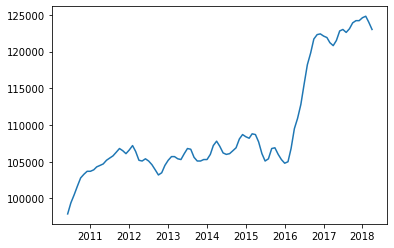

In [79]:
plt.plot(a_ts[170:])

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results